In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
class myCallback1(tf.keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs={}):
                if(logs.get('accuracy')>0.9950):
                    print("\nReached 99.50% accuracy so cancelling training!")
                    self.model.stop_training = True
callbacks=myCallback1()

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
BATCH_SIZE=32
EPOCHS=100
LEARNING_RATE=0.001
CLASSES=10

In [0]:
model = tf.keras.models.Sequential(
                                    [tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
)

In [0]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [8]:
# model fitting
history = model.fit(
         x_train,y_train,validation_data=(x_test,y_test),epochs=EPOCHS,callbacks=[callbacks]
    )

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3947 - accuracy: 0.9392 - val_loss: 0.4184 - val_accuracy: 0.9326
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3917 - accuracy: 0.9384 - val_loss: 0.4269 - val_accuracy: 0.9303
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3314 - accuracy: 0.9452 - val_loss: 0.4942 - val_accuracy: 0.9360
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3029 - accuracy: 0.9501 - val_loss: 0.3700 - val_accuracy: 0.9453
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9535 - val_loss: 0.3846 - val_accuracy: 0.9475
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2493 - accuracy: 0.9569 - val_loss: 0.3626 - val_accuracy: 0.9452
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2200 - accuracy: 0.9604 - val_loss: 0.3699 - val_ac

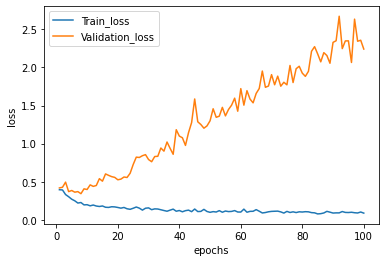

In [11]:
epochs=len(history.history['loss'])
plt.plot([i for i in range(1,epochs+1)],history.history['loss'],label="Train_loss")
plt.plot([i for i in range(1,epochs+1)],history.history['val_loss'],label="Validation_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

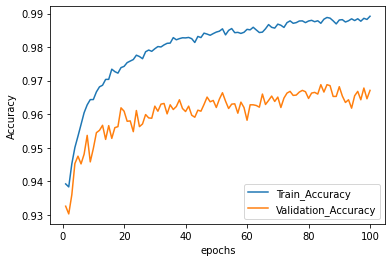

In [12]:
plt.plot([i for i in range(1,epochs+1)],history.history['accuracy'],label="Train_Accuracy")
plt.plot([i for i in range(1,epochs+1)],history.history['val_accuracy'],label="Validation_Accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()